<img  src=http://repository.icesi.edu.co/biblioteca_digital/image/icesi-logo.svg height="250" width="250">

**Autor: Felipe Cortes, Cristian Rodriguez**

In [1]:
from sklearn.datasets import load_digits
import pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import neighbors, metrics

In [2]:
digits = load_digits()
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
numero = 7; # El número a buscar

# Método que devuelve el total de números en el dataset
def numeroTotal(num,totalImagenes):
    numY = 0;
    for i in range(totalImagenes):
        if(y[i] == num):
            numY += 1;
    return numY;

# Método que devuelve todas las imágenes del número pasado por parametro en el dataset
def visualizarTodosNumeros(num,totalImagenes):
    for i in range(totalImagenes):
        if(y[i] == num):
            plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
            plt.title('Pred:' + str(i))
            plt.show()

In [3]:
# Mostrar la información: 

print('Número total de imágenes: ' + str(numImagenes));
print('Número total de ', numero , ' en el dataset: ', numeroTotal(numero,numImagenes));

Número total de imágenes: 1797
Número total de  7  en el dataset:  179


<img  src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png
 height="250" width="250">




# Análisis global

Se pretende probar la capacidad del modelo de Machine Learning KNN ó K Nearest Neighbors que requiere la especificación del parámetro K, con el número de vecinos que se considerarán para tomar la decisión de clasificación (recuerden que K-NN también permite hacer regresión).

A continuación, se implementara el algoritmo KNN sobre todo el Dataset N-MIST teniendo en cuenta que no solo se analizará a un número en particular sino que a todos los números y como es capaz de encontrar las asociaciones.

In [4]:
# Se cargan las imágenes y los respectivos resultados asociados a cada imágen. 
digits = load_digits()
X = np.array(digits.data)
Y = digits.target

Dado que es importante dividir el dataset, 60% de los datos se van a utilizar para aprender, 40% para evaluar el modelo de clasificación.
Utilizamos el método *train_test_split* de scikit-learn, que se encarga de hacer el particionamiento aleatorio. 

Por otra parte, se destinará un 10% de los datos de prueba para realizar una validación sobre las pruebas. 

In [5]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(X), 
                                            Y, test_size=0.4, random_state=42, stratify=Y)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

Posteriormente, ajustaremos el modelo a los datos de entrenamiento y los resultados los validaremos con los datos de prueba y su respectiva validación. 

In [6]:
kVals = range(1, 30,2)
accuracies = []
for k in range(1, 30, 2):
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

k=1, accuracy=98.15%
k=3, accuracy=98.15%
k=5, accuracy=98.15%
k=7, accuracy=97.22%
k=9, accuracy=99.07%
k=11, accuracy=98.15%
k=13, accuracy=97.22%
k=15, accuracy=98.15%
k=17, accuracy=98.15%
k=19, accuracy=97.22%
k=21, accuracy=97.22%
k=23, accuracy=97.22%
k=25, accuracy=96.30%
k=27, accuracy=95.37%
k=29, accuracy=95.37%


Para el análisis global encontramos que el K más obtimo para realizar el ajuste del modelo es K=9.

# Matriz de Confución


<img  src=https://upload.wikimedia.org/wikipedia/commons/9/9c/Matriz_confusion.png
 height="250" width="250">
 


In [8]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(trainData, trainLabels)
y_pred = model.predict(X)

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

([<matplotlib.axis.YTick at 0x7f191f483e80>,
 <a list of 10 Text yticklabel objects>)

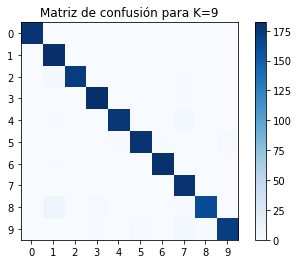

In [10]:
cm= metrics.confusion_matrix(Y, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=9")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)

In [11]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(Y, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(Y, y_pred))
print("-------------------------------------")

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   3 173   0   0   0   0   1   0   0]
 [  0   0   0 182   0   0   0   1   0   0]
 [  0   1   0   0 177   0   0   3   0   0]
 [  0   0   0   0   1 178   1   0   0   2]
 [  0   1   0   0   0   0 180   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   9   0   2   0   0   0   1 162   0]
 [  0   0   0   1   0   2   0   4   1 172]]
Exactitud:  0.9810795770728993
Kappa    :  0.9789761280055056
-------------------------------------





<img  src=https://hollandbikeshop.com/img/prod/gmg-yepp-abc-digito-7-8715362005854-0-l.jpg
 height="250" width="250">
 
# Análisis preliminar Sólo dígito 7 

Dado que se consideró que erá necesario contrastar el modelo mecánico de un sólo digito con el modelo de machine learning que utilizaba el algoritmo KNN se intento realizar un modelo que solo predijiera el dígito 7.

In [12]:
def arreglo_numero(num,totalImagenes):
    arreglo = []
    for i in range(totalImagenes):
        if(y[i] == num):
            arreglo.append(digits.data[i])
    return arreglo

In [13]:
def arreglo_numero_label(num,totalImagenes):
    arreglo = [];
    for i in range(totalImagenes):
        if(y[i] == num):
            arreglo.append(y[i])
    return arreglo

In [14]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data), 
                                            digits.target, test_size=0.25, random_state=42, stratify=digits.target)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [15]:
kVals = range(1, 30,2)
accuracies = []

for k in range(1, 30, 2):
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
        

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=98.52%
k=7, accuracy=98.52%
k=9, accuracy=99.26%
k=11, accuracy=98.52%
k=13, accuracy=98.52%
k=15, accuracy=97.78%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=98.52%
k=23, accuracy=98.52%
k=25, accuracy=98.52%
k=27, accuracy=97.78%
k=29, accuracy=97.78%


In [16]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(testData, testLabels)
X = testData
Y = testLabels
y_pred = model.predict(X)

([<matplotlib.axis.YTick at 0x7f191f6d4fd0>,
 <a list of 10 Text yticklabel objects>)

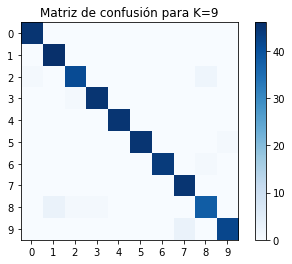

In [17]:
cm= metrics.confusion_matrix(Y, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=9")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)

In [18]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(Y, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(Y, y_pred))
print("-------------------------------------")

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 1  0 41  0  0  0  0  0  2  0]
 [ 0  0  1 45  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  1  1  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  3  0 42]]
Exactitud:  0.9688888888888889
Kappa    :  0.9654292534364968
-------------------------------------



<img  src=http://ugelputina.edu.pe/site/wp-content/uploads/2018/12/RESULTADOS.png height="250" width="250">


# Análisis de los resultados

+ El accuracy y kappa global de cada clasificador
+ El precision, recall, especificidad y F-Measure de cada clase

In [19]:
a = digits.data[9]
y_pred = model.predict(a.reshape(1, -1))

In [20]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [21]:
y_pred[0]

9

In [22]:
#Pruebas de la veracidad del modelo mecánico

# Método para calcular predicción verdadera
def prediccion_realidad(numero, totalImagenes):
    num = 0;
    for i in range(totalImagenes):
        a = digits.data[i]
        y_pred = model.predict(a.reshape(1, -1))
        if(y[i] == numero):
            if(y[i] == y_pred[0]):
                num += 1;
    return num;

# Método para calcular falso positivo
def prediccion_no_realidad(numero, totalImagenes):
    num = 0;
    for i in range(totalImagenes):
        a = digits.data[i]
        y_pred = model.predict(a.reshape(1, -1))
        if(y[i] != numero):
            if(y[i] == y_pred[0]):
                num += 1;
    return num;

# Método para calcular falso negativo
def no_prediccion_realidad(numero, totalImagenes):
    num = 0;
    for i in range(totalImagenes):
        a = digits.data[i]
        y_pred = model.predict(a.reshape(1, -1))
        if(y[i] == numero):
            if(y[i] != y_pred[0]):
                num += 1;
    return num;

# Método para calcular verdadero negativo
def no_prediccion_no_realidad(numero, totalImagenes):
    num = 0;
    for i in range(totalImagenes):
        a = digits.data[i]
        y_pred = model.predict(a.reshape(1, -1))
        if(y[i] != numero):
            if(y[i] != y_pred[0]):
                num += 1;
    return num;



In [23]:
numero = 7;
total = numeroTotal(numero,numImagenes);
vp = prediccion_realidad(numero,numImagenes);
fp = prediccion_no_realidad(numero,numImagenes);
fn = no_prediccion_realidad(numero,numImagenes);
vn = no_prediccion_no_realidad(numero,numImagenes);
print("-------------------------------------------------")
print("Pruebas")
print("-------------------------------------------------")
print("Número total de imágenes: " + str(numImagenes));
print("-------------------------------------------------")
print("Número total de " + str(numero) + " es de " + str(total)  + ".");
print("-------------------------------------------------")
print("Numero de predicciones verdaderas: ", str(vp));
print("-------------------------------------------------")
print("Numero de falsos positivos: ", str(fp));
print("-------------------------------------------------")
print("Numero de falsos negativos: ", str(fn));
print("-------------------------------------------------")
print("Numero de verdaderos negativos: ", str(vn));
print("-------------------------------------------------")

-------------------------------------------------
Pruebas
-------------------------------------------------
Número total de imágenes: 1797
-------------------------------------------------
Número total de 7 es de 179.
-------------------------------------------------
Numero de predicciones verdaderas:  178
-------------------------------------------------
Numero de falsos positivos:  1556
-------------------------------------------------
Numero de falsos negativos:  1
-------------------------------------------------
Numero de verdaderos negativos:  62
-------------------------------------------------


In [24]:
# Tasa de correctitud (accuracy)
def accuracy(vp, fp, fn, vn):
    resultado = (vp+vn)/(vp+fp+fn+vn);
    return resultado;

# Error de mala clasificación (contrario de accuracy)
def accuracy_opposite(vp, fp, fn, vn):
    resultado = (fp+fn)/(vp+fp+fn+vn);
    return resultado;

# Precisión
def precision(vp, fp, fn, vn):
    resultado = (vp)/(vp+fp);
    return resultado;

# Recall (o TPR o sensibilidad)
def recall(vp, fp, fn, vn):
    resultado = (vp)/(vp+fn);
    return resultado;

# Especificidad (o TNR)
def especificidad(vp, fp, fn, vn):
    resultado = (vn)/(fp+vn);
    return resultado;

# Valor de predicción negativa (FPR)
def valor_precision_negativa(vp, fp, fn, vn):
    resultado = (vn)/(fn+vn);
    return resultado;

# F1-Measure
def f1_Measure(vp, fp, fn, vn):
    p = precision(vp,fp,fn,vn);
    r = recall(vp,fp,fn,vn)
    resultado = 2*((p*r)/(p+r));
    return resultado;

# Concordancia entre las predicciones 
def probabilidad_aciertos(vp, fp, fn, vn):
    p_si = ((vp+fp)/(vp+fp+vn+fn))*accuracy(vp,fp,fn,vn);
    p_no = ((vn+fn)/(vp+fp+vn+fn))*accuracy_opposite(vp,fp,fn,vn);
    return p_si + p_no;

# Coeficiente de concordancia Kappa
def kappa(vp, fp, fn, vn):
    p = probabilidad_aciertos(vp, fp, fn, vn);
    a = accuracy(vp,fp,fn,vn);
    return (a-p)/(1-p);

In [26]:
numero = 9;
total = numeroTotal(numero,numImagenes);
vp = prediccion_realidad(numero,numImagenes);
fp = prediccion_no_realidad(numero,numImagenes);
fn = no_prediccion_realidad(numero,numImagenes);
vn = no_prediccion_no_realidad(numero,numImagenes);
print("-------------------------------------------------")
print("Análisis")
print("-------------------------------------------------")
print("Número total de imágenes: " + str(numImagenes));
print("-------------------------------------------------")
print("Metricas del Modelo Mecánico. ");
print("-------------------------------------------------")
print("Tasa de correctitud o Accuracy: " + str(accuracy(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Error de mala clasificación (contrario de accuracy): " + str(accuracy_opposite(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Precision: " + str(precision(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Recall: " + str(recall(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Especificidad: ", str(especificidad(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Valor_precision_negativa (FPR): " + str(valor_precision_negativa(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("F1-Measure: " + str(f1_Measure(vp,fp,fn,vn)));
print("-------------------------------------------------")
print("Kappa: " + str(kappa(vp,fp,fn,vn)));
print("-------------------------------------------------")

-------------------------------------------------
Análisis
-------------------------------------------------
Número total de imágenes: 1797
-------------------------------------------------
Metricas del Modelo Mecánico. 
-------------------------------------------------
Tasa de correctitud o Accuracy: 0.11741791875347801
-------------------------------------------------
Error de mala clasificación (contrario de accuracy): 0.8825820812465219
-------------------------------------------------
Precision: 0.09457900807381776
-------------------------------------------------
Recall: 0.9111111111111111
-------------------------------------------------
Especificidad:  0.02906617192331478
-------------------------------------------------
Valor_precision_negativa (FPR): 0.746031746031746
-------------------------------------------------
F1-Measure: 0.17136886102403345
-------------------------------------------------
Kappa: -0.03134706054135153
-------------------------------------------------
